In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "/home/jaime/PhD/LimberJack.jl/chains/carlos_chains/cl_cross_corr_v3_DES_K1000_all_mag_correctMag/"
cls_carlos_SD = np.load(path+"cl_cross_corr_bestfit_info_copy.npz")['cls']

In [3]:
meta = np.load("../data/SD/SD_meta.npz")
files = np.load("../data/SD/SD_files.npz")

In [4]:
def add_cls(path):
    cls = []
    i = 1 
    while os.path.isfile(path+"cls_{}.npz".format(i)):
        cl = np.load(path+"cls_{}.npz".format(1))
        cls.append(cl)
        i += 1
    return np.concatenate(cls, 1)

In [5]:
cls_jaime = add_cls("../chains/SD_TAP_0.6/")

In [51]:
len([item for item in list(files.keys()) if 'ls' in item])

48

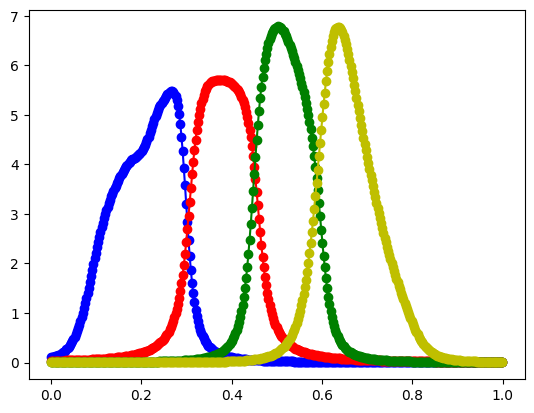

In [26]:
plt.plot(files["nz_DECALS__0_0"][0], files["nz_DECALS__0_0"][1], 'bo-', label="1")
plt.plot(files["nz_DECALS__1_0"][0], files["nz_DECALS__1_0"][1], 'ro-', label="2")
plt.plot(files["nz_DECALS__2_0"][0], files["nz_DECALS__2_0"][1], 'go-', label="3")
plt.plot(files["nz_DECALS__3_0"][0], files["nz_DECALS__3_0"][1], 'yo-', label="4")

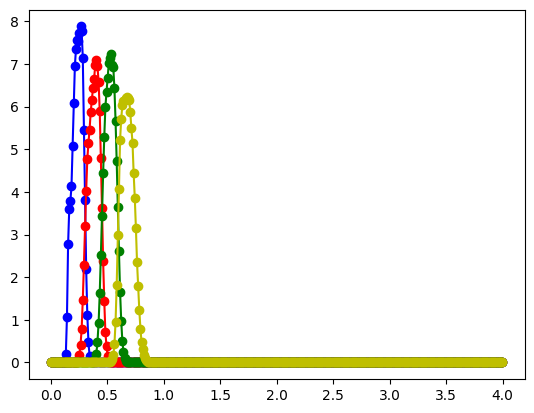

In [29]:
plt.plot(files["nz_DESgc__0_0"][0], files["nz_DESgc__0_0"][1], 'bo-', label="1")
plt.plot(files["nz_DESgc__1_0"][0], files["nz_DESgc__1_0"][1], 'ro-', label="2")
plt.plot(files["nz_DESgc__2_0"][0], files["nz_DESgc__2_0"][1], 'go-', label="3")
plt.plot(files["nz_DESgc__3_0"][0], files["nz_DESgc__3_0"][1], 'yo-', label="4")

# Lengths

In [6]:
len(cls_carlos_SD) 

610

In [7]:
len(cls_jaime)

610

# Plots

In [55]:
ls_tot = np.array([])
for l in range(len([item for item in list(files.keys()) if 'ls' in item])):
    t1, t2 = pairs[l][0], pairs[l][1]
    ls_tot = np.append(ls_tot, files["ls_{}_{}".format(t1, t2)])
ls_tot

array([  44.5,   74.5,  104.5,   44.5,   74.5,  104.5,  134.5,  164.5,
        194.5,  224.5,   44.5,   74.5,  104.5,  134.5,  164.5,  194.5,
        224.5,  255.5,  290. ,   44.5,   74.5,  104.5,  134.5,  164.5,
        194.5,  224.5,  255.5,  290. ,  329.5,  374. ,  104.5,  104.5,
        104.5,  104.5,  104.5,  104.5,  134.5,  164.5,  194.5,  224.5,
        104.5,  134.5,  164.5,  194.5,  224.5,  104.5,  134.5,  164.5,
        194.5,  224.5,  104.5,  134.5,  164.5,  194.5,  224.5,  104.5,
        134.5,  164.5,  194.5,  224.5,  104.5,  134.5,  164.5,  194.5,
        224.5,  255.5,  290. ,  104.5,  134.5,  164.5,  194.5,  224.5,
        255.5,  290. ,  104.5,  134.5,  164.5,  194.5,  224.5,  255.5,
        290. ,  104.5,  134.5,  164.5,  194.5,  224.5,  255.5,  290. ,
        104.5,  134.5,  164.5,  194.5,  224.5,  255.5,  290. ,  104.5,
        134.5,  164.5,  194.5,  224.5,  255.5,  290. ,  329.5,  374. ,
        104.5,  134.5,  164.5,  194.5,  224.5,  255.5,  290. ,  329.5,
      

In [59]:
data = meta["cls"]
err = np.sqrt(np.diag(meta["cov"]))
#err = np.sqrt((2*data**2)/((2*ls_tot+1)*0.23))
pairs = meta["pairs"]
idx = meta["idx"]
cls_m = np.mean(cls_jaime, 1)
cls_s = np.std(cls_jaime, 1)
cls_carlos = cls_carlos_SD

In [60]:
Xi2 = np.dot(np.dot((cls_m-data), meta['inv_cov']), (cls_m-data))
Xi2_reduced = Xi2/(len(cls_jaime)-20)
print(Xi2, Xi2_reduced)

688.4681648610513 1.166895194679748


## DECALS - DECALS

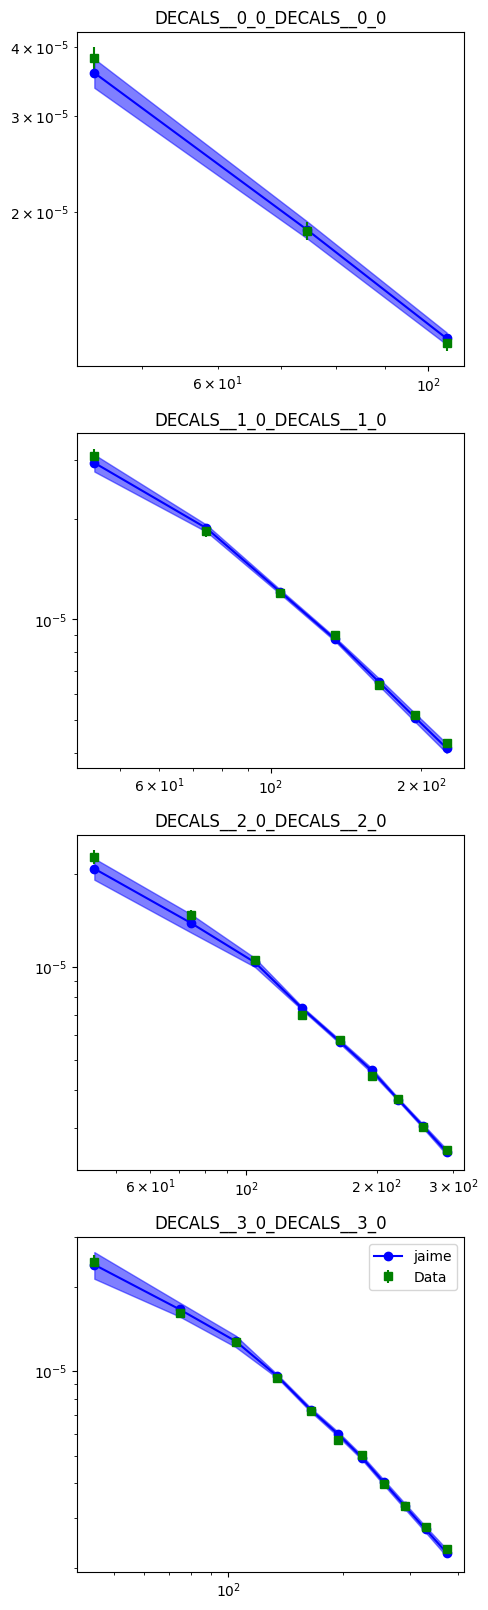

4


In [61]:
figure, axis = plt.subplots(4, figsize=(5,20))
l = 0
for i in range(0,4):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    #axis[i].plot(files["ls_{}_{}".format(t1, t2)],
    #             cls_carlos[idx[l]:idx[l+1]],
    #             "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    axis[i].loglog()
    l += 1
plt.legend()
plt.show()
print(l)

## DECALS-KiDS1000

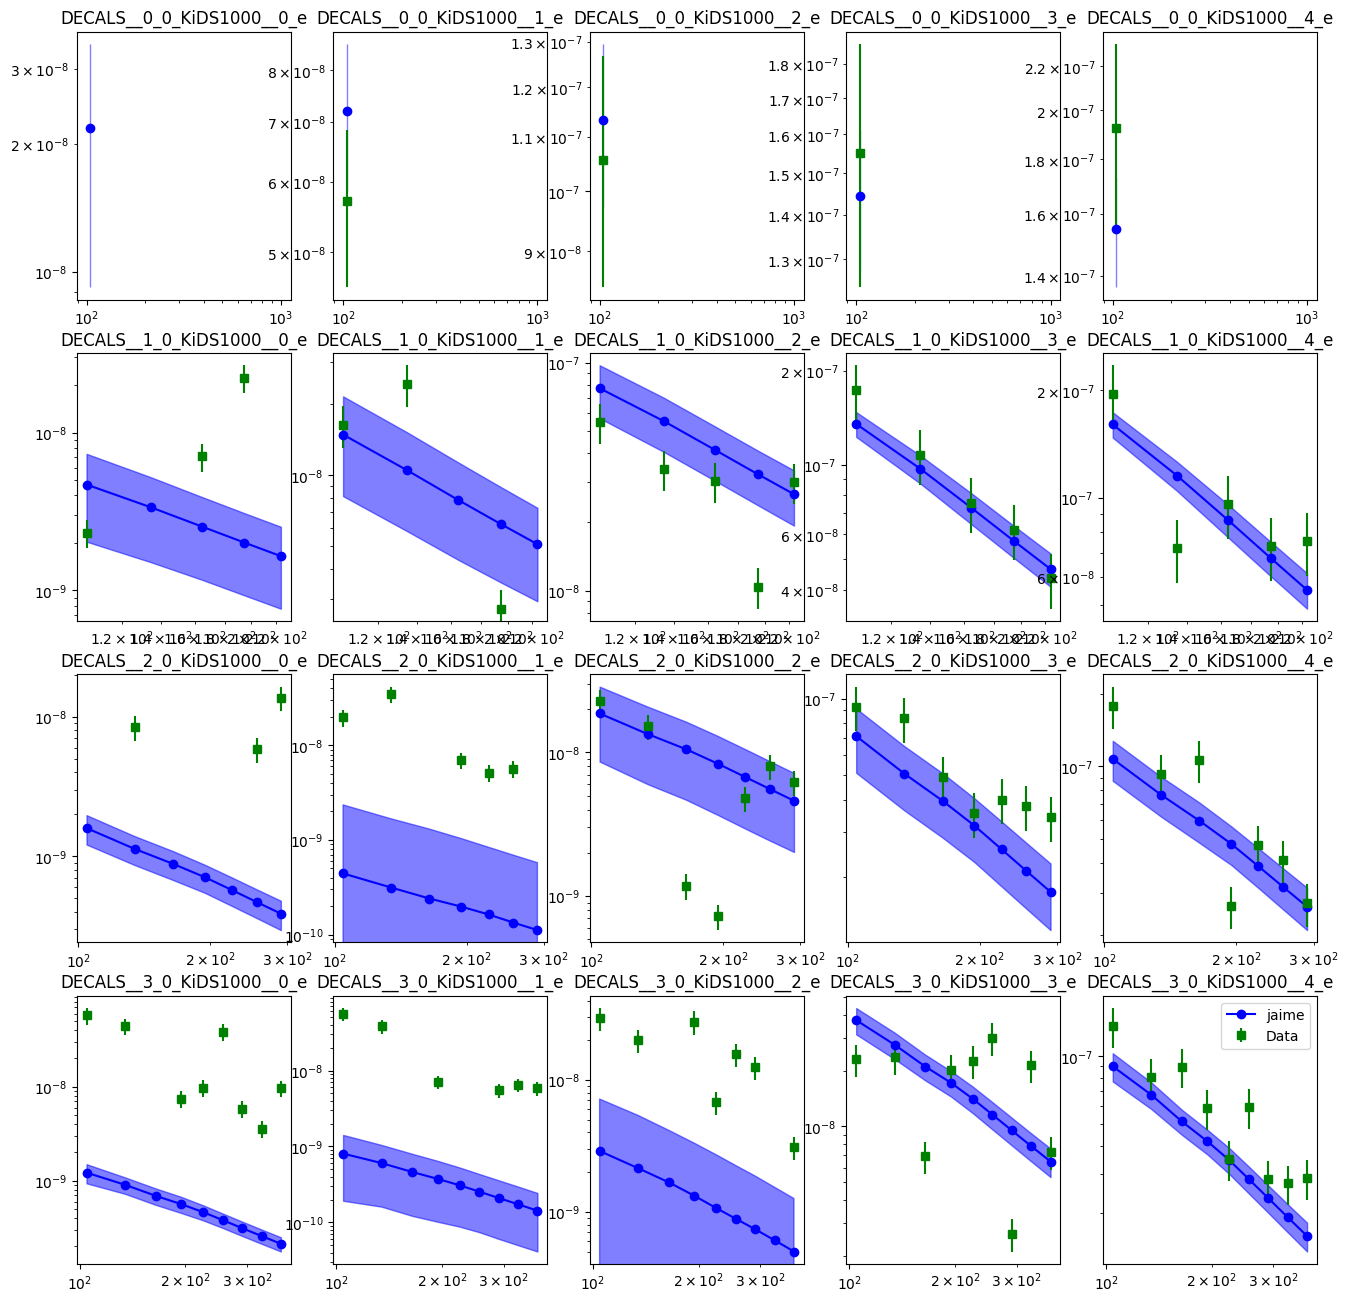

24


In [15]:
figure, axis = plt.subplots(4, 5, figsize=(16,16))
l = 4
for i in range(0,4):
    for j in range(0,5):
        t1, t2 = pairs[l][0], pairs[l][1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
        #                cls_carlos[idx[l]:idx[l+1]],
        #                "ro-", label="carlos")
        axis[i, j].set_title("{}_{}".format(t1,t2))
        axis[i, j].loglog()
        l += 1
plt.legend()
plt.show()
print(l)

## DECALS-CMBk

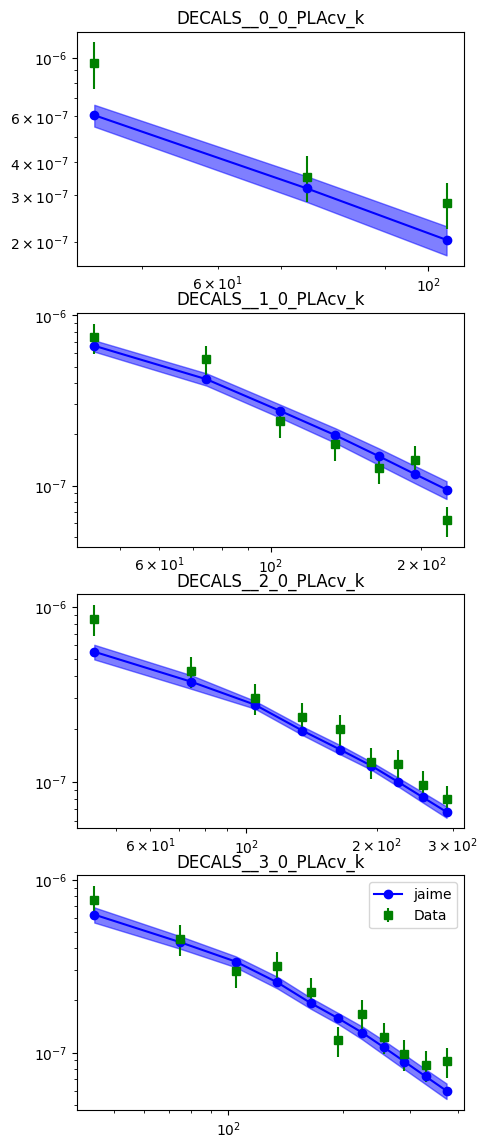

28


In [16]:
figure, axis = plt.subplots(4, figsize=(5,14))
l = 24
for i in range(0,4):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    #axis[i].plot(files["ls_{}_{}".format(t1, t2)],
    #             cls_carlos[idx[l]:idx[l+1]],
    #             "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    axis[i].loglog()
    l += 1
plt.legend()
plt.show()
print(l)

## KiDS1000-KiDS1000

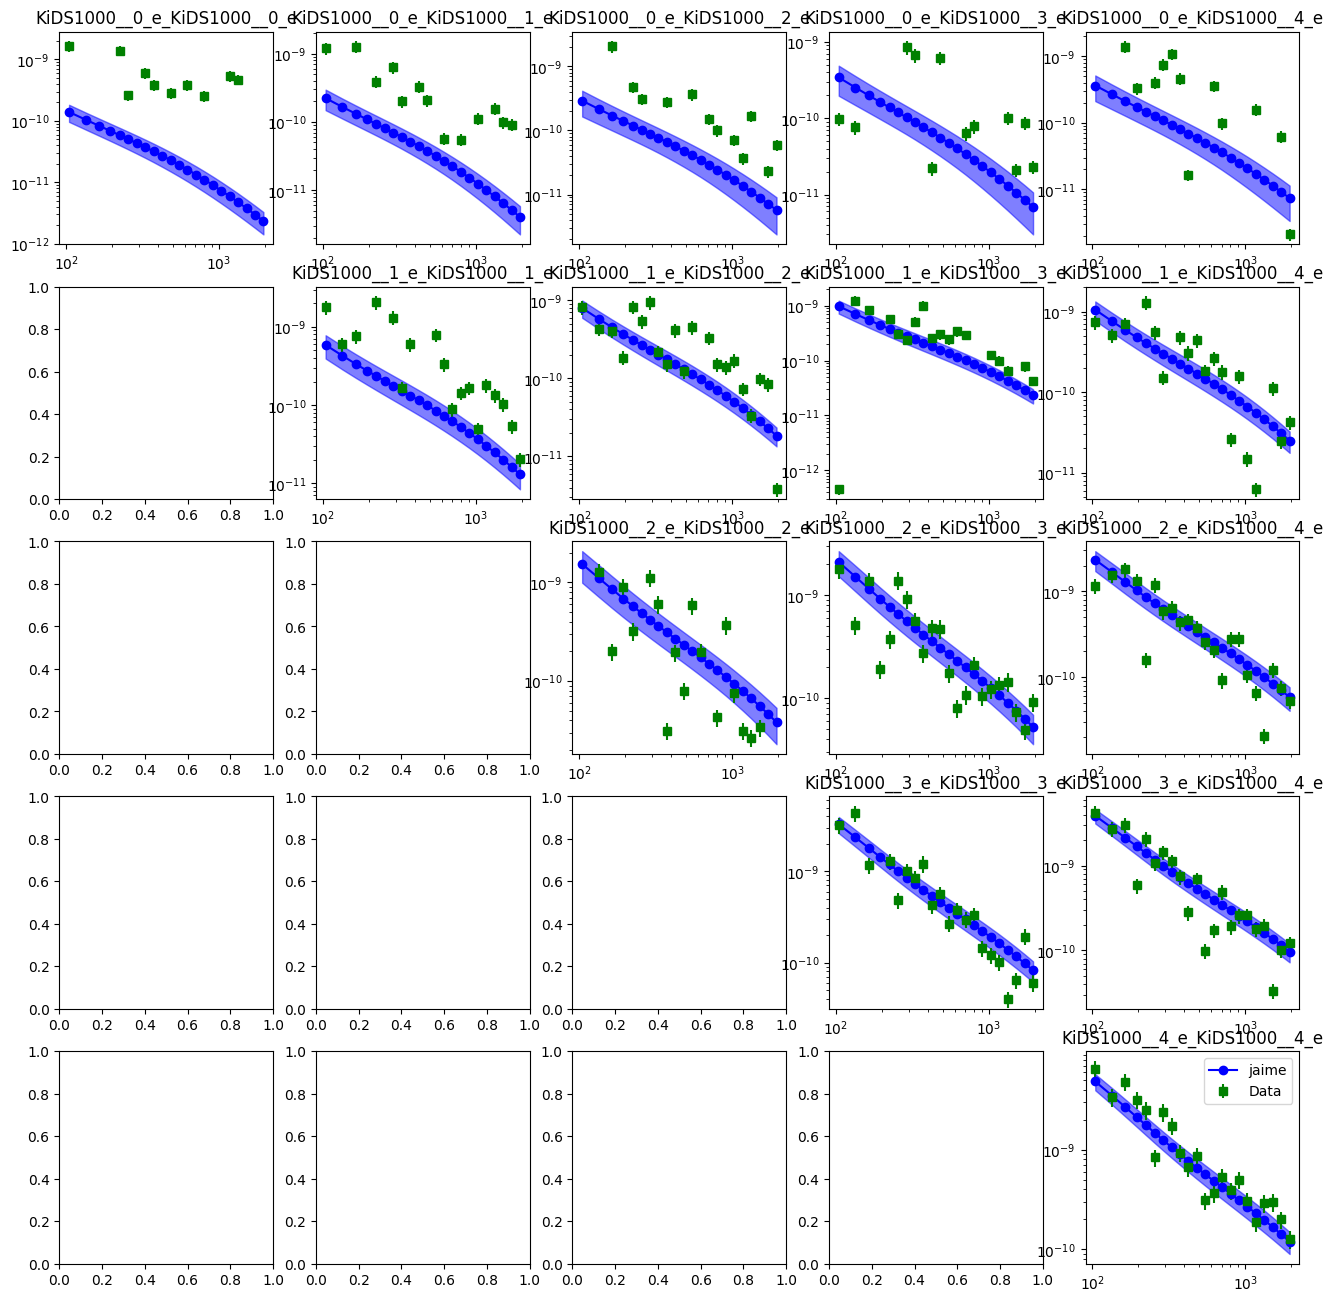

43


In [17]:
figure, axis = plt.subplots(5, 5, figsize=(16,16))
l = 28
for i in range(0,5):
    for j in range(0,5):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            axis[i, j].loglog()
            l += 1
plt.legend()
plt.show()
print(l)

## KiDS1000-CMBk

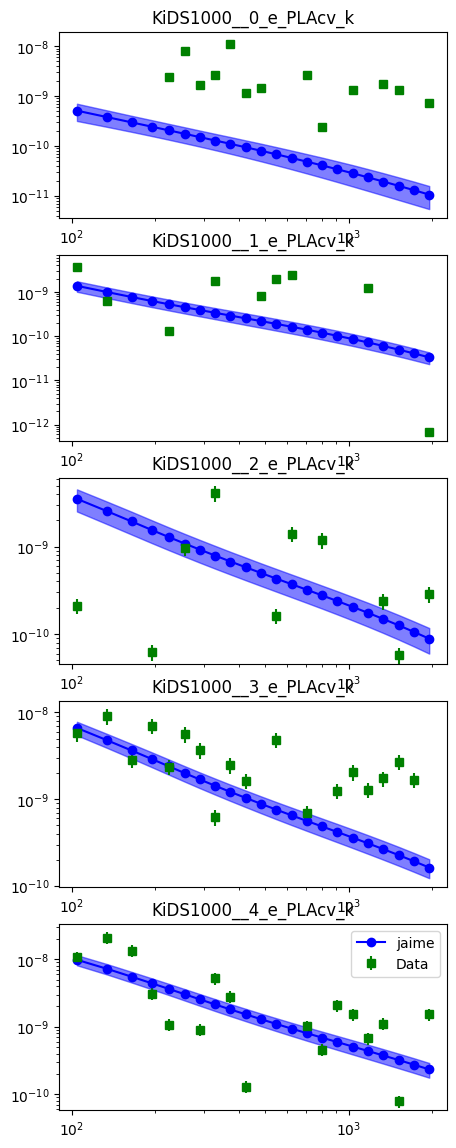

48


In [18]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 43
for i in range(0,5):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    #axis[i].plot(files["ls_{}_{}".format(t1, t2)],
    #             cls_carlos[idx[l]:idx[l+1]],
    #             "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    axis[i].loglog()
    l += 1
plt.legend()
plt.show()
print(l)